## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Load Dataset

In [ ]:
boston = pd.read_csv('https://drive.google.com/uc?id=1OnS4R-dn3m4_TAG9VCctf_PxRfBU8rtZ')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing (20 point)

### Data Cleaning and Multicollinearity Check

We first check the number of missing values in this dataset.

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can see that there is no missing values in this dataset. Next, we check if there is any duplicated values in this dataset.

In [ ]:
boston.duplicated().sum()

0

Again, there is no duplicated values in this dataset. Now, we check the outliers of this dataset.

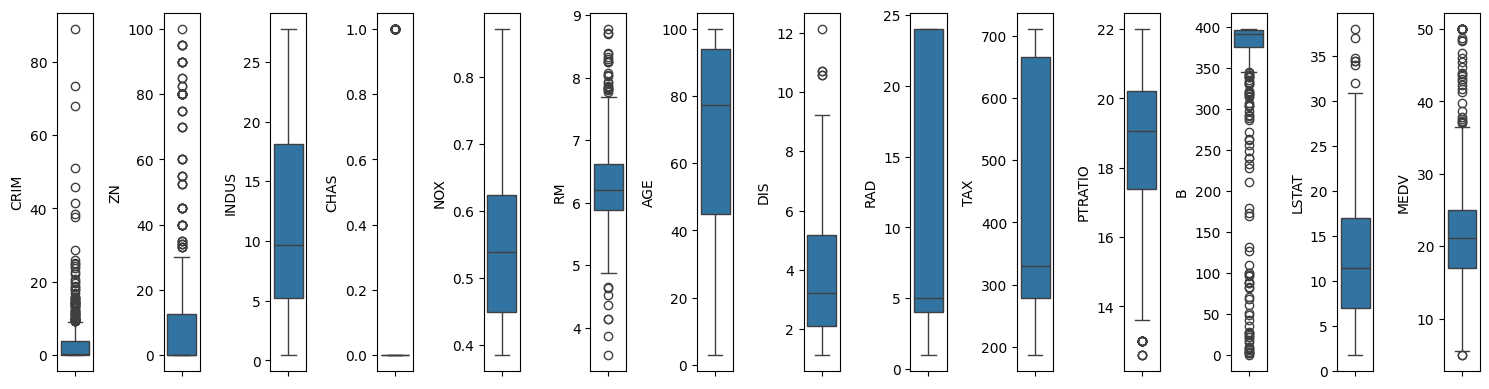

In [ ]:
cols = boston.columns
fig, axes = plt.subplots(1, 14, figsize=(15,4))

for i in range(14):
  sns.boxplot(boston[cols[i]], ax=axes[i])

plt.tight_layout()
plt.show()

We attain that there are a lot of outliers in each columns. Nevertheless, we cannot remove them all since we only have a few data. Furthermore, we want to do multicollinearity check, thus, to support this process, we need the data to be as it is for analysis purposes. We start by checking the VIF score.

In [ ]:
X = add_constant(boston)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.831537
2,ZN,2.352186
3,INDUS,3.992503
4,CHAS,1.095223
5,NOX,4.586920
6,RM,2.260374
7,AGE,3.100843
8,DIS,4.396007
9,RAD,7.808198
10,TAX,9.205542


We attain that RAD and TAX have score higher than 5. Hence, we need to check their correlation score.

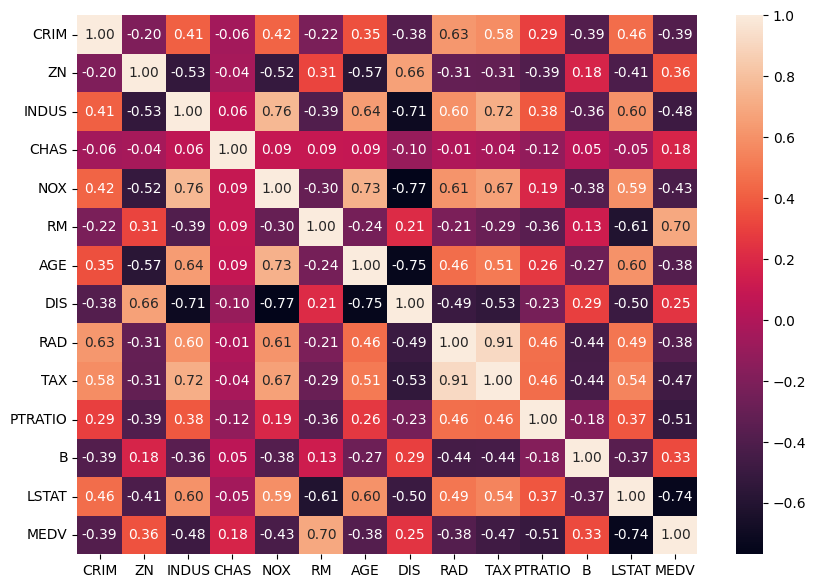

In [ ]:
corr = boston.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

The correlation between RAD and TAX is higher than 0.8, thus, we have to select one of them. We obtain that their correlation with medv are
$$
|Corr(RAD, MEDV)| = |-0.38| < |-0.47| = |Corr(TAX,MEDV)|.
$$
Hence, we decided to select TAX and drop RAD.

In [ ]:
boston = boston.drop('RAD', axis = 1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


Since the column that we drop does not have any outliers based on the previous chart, we still have to handle the outliers.

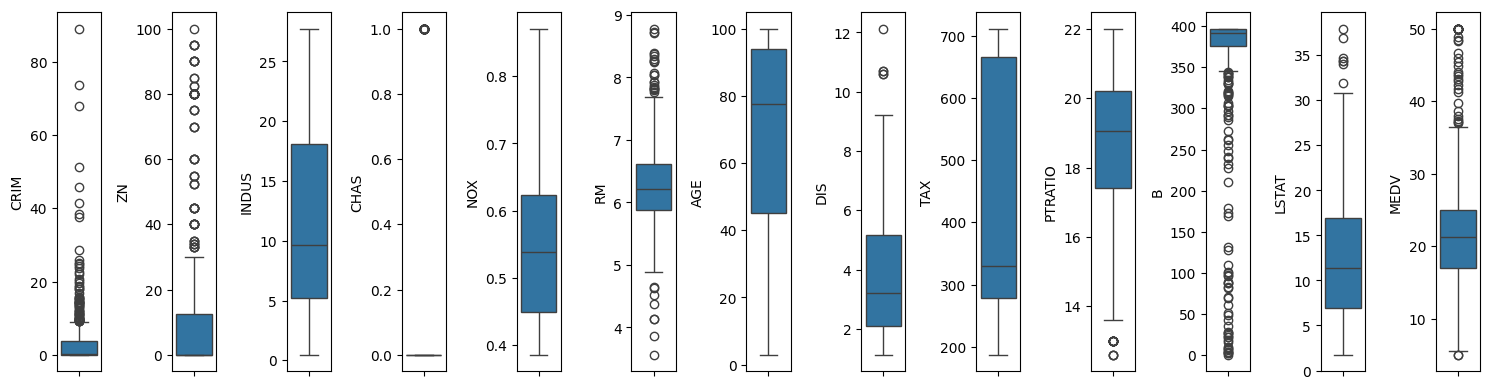

In [ ]:
cols = boston.columns
fig, axes = plt.subplots(1, 13, figsize=(15,4))

for i in range(13):
  sns.boxplot(boston[cols[i]], ax=axes[i])

plt.tight_layout()
plt.show()

Let us check statistical description first before deciding what to do with these outliers.

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


We will let the column medv be as it is because it will be our target. The column chas is actually categorical since it only has 0 and 1 values, so we also let it be. Meanwhile, the columns CRIM, ZN, RM, DIS, PTRATIO, B, and LSTAT need to be handled. We will try to do logarithm transformation first. Notice that the column ZN has 0 as minimum value, thus, if we apply logarithm transformation it will result to infinity values. Hence, we add a small constant (we use 1) for this column transformation.

In [ ]:
cols = ['CRIM', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
boston_tf = boston.copy()
boston_tf[cols] = boston_tf[cols].apply(np.log)
boston_tf['ZN'] = np.log(boston_tf['ZN'] + 1)

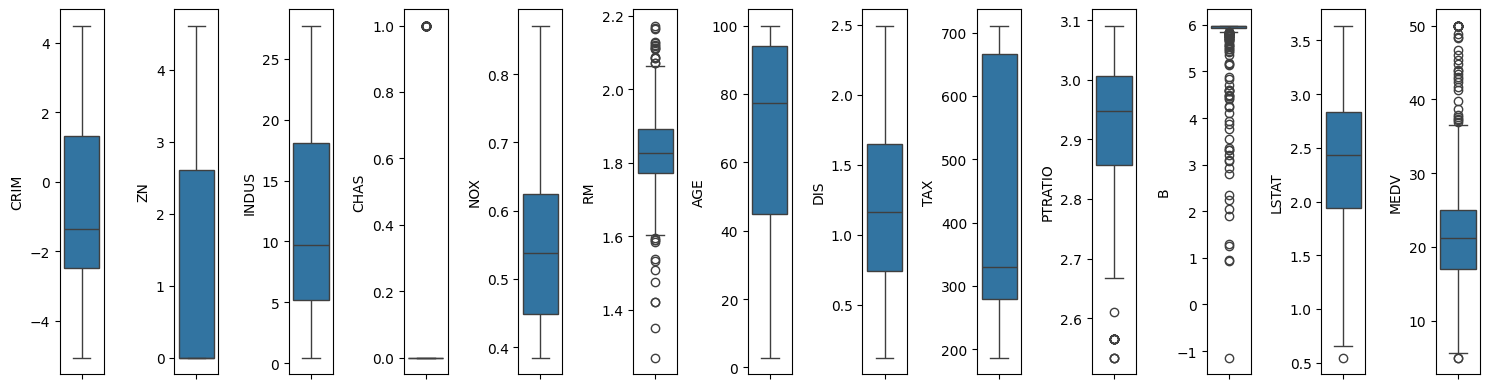

In [ ]:
cols = boston_tf.columns
fig, axes = plt.subplots(1, 13, figsize=(15,4))

for i in range(13):
  sns.boxplot(boston_tf[cols[i]], ax=axes[i])

plt.tight_layout()
plt.show()

We get that some of the outliers are handled. However, we have that the column B is better before performing the transformation, so we will return it back and do imputation by median. The column RM, PTRATIO, and LSTAT still have many outliers, so we will also do imputation using median because it is robust over outliers.

In [ ]:
boston_tf['B'] = boston['B']
cols = ['RM', 'PTRATIO', 'B', 'LSTAT']

for col in cols:
  Q1 = boston_tf[col].quantile(0.25)
  Q3 = boston_tf[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median_value = boston_tf[col].median()
  boston_tf[col] = np.where((boston_tf[col] < lower_bound) | (boston_tf[col] > upper_bound), median_value, boston_tf[col])

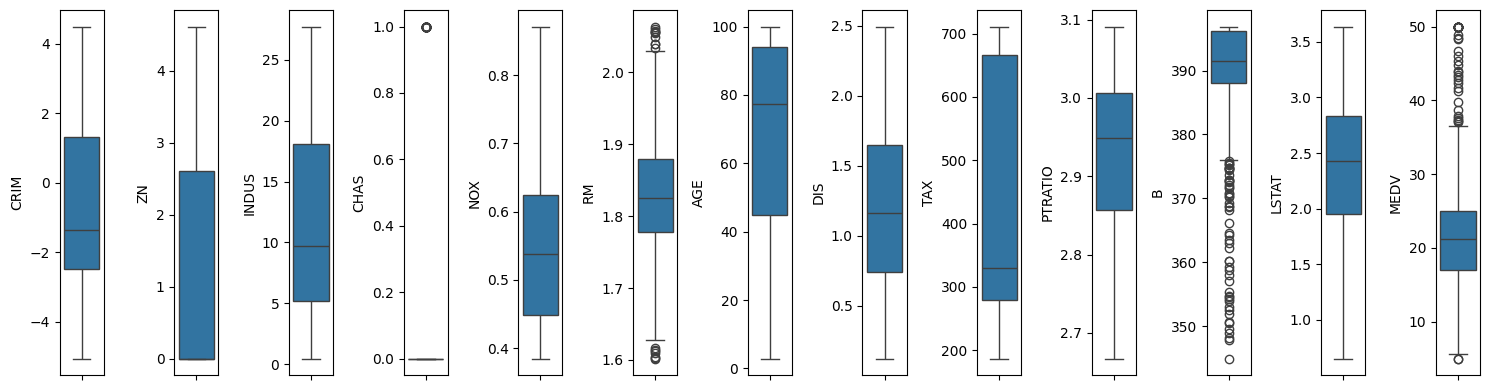

In [ ]:
cols = boston_tf.columns
fig, axes = plt.subplots(1, 13, figsize=(15,4))

for i in range(13):
  sns.boxplot(boston_tf[cols[i]], ax=axes[i])

plt.tight_layout()
plt.show()

The outliers in the column RM and B are excessive, thus, it is not surprising if there are still a lot of outliers. Because it is better already than before, we end this outliers handling.

### PCA Prosess (40)

#### Feature - Target Split and Scaling

Before we do the PCA technique, we will split the feature and target data first, then we will do scaling using standardscaler.

In [ ]:
X = boston_tf.drop('MEDV', axis=1)
feats = X.columns
y = boston_tf['MEDV']

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-1.983228,1.229330,-1.287909,-0.272599,-0.144217,0.614091,-0.120013,0.409104,-0.666608,-1.780714,0.752977,-1.293307
1,-1.305639,-0.589091,-0.593381,-0.272599,-0.740262,0.334176,0.367166,0.769562,-0.987329,-0.378801,0.752977,-0.272402
2,-1.305978,-0.589091,-0.593381,-0.272599,-0.740262,1.661921,-0.265812,0.769562,-0.987329,-0.378801,0.358976,-1.649165
3,-1.226942,-0.589091,-1.306878,-0.272599,-0.835284,1.350467,-0.809889,1.139194,-1.106115,0.078097,0.533227,-2.179358
4,-0.876187,-0.589091,-1.306878,-0.272599,-0.835284,1.599292,-0.511180,1.139194,-1.106115,0.078097,0.752977,-1.179114


#### Principal Component Analysis

Now, we are ready to calculate the PCA of this data.

In [ ]:
pca = PCA(n_components=len(feats))
pca.fit(X_std)
pcs = pca.transform(X_std)

cols = ['pc'+str(i) for i in range(1,len(feats)+1)]
pdf = pd.DataFrame(data = pcs, columns = cols)
pdf['MEDV'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,MEDV
0,-2.898905,0.669881,0.524582,0.597608,-1.522071,0.018614,0.292714,-0.659166,0.010391,0.258954,0.070348,-1.103638,24.0
1,-1.514838,-0.422568,0.060330,0.945102,-0.371119,-1.192897,0.143910,0.415790,0.203548,0.465558,0.354975,-0.340081,21.6
2,-2.390077,0.431471,1.050733,0.019122,-0.053205,-1.609887,-0.565406,0.216231,0.283417,0.282443,0.479251,-0.254875,34.7
3,-3.038531,-0.009848,1.022587,0.029724,0.488022,-1.573161,-0.882623,-0.141108,-0.362425,0.145672,0.594825,-0.275063,33.4
4,-2.551451,-0.213937,1.139255,0.242867,0.350444,-1.446000,-0.261280,0.546432,-0.403893,-0.037559,0.486230,-0.065197,36.2


Dervied from this computation we can calculate the explained variance and explained variance ratio.

In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [5.9167977  1.27841143 1.01528344 0.95696536 0.76790043 0.65492915
 0.44328574 0.28694178 0.25282562 0.19374541 0.13905152 0.1176248 ]
Explained variance ratio: [0.49209204 0.10632374 0.08443975 0.07958951 0.06386524 0.05446957
 0.03686747 0.02386456 0.02102716 0.01611354 0.01156473 0.00978269]


We visualize the result by using this code.

<BarContainer object of 12 artists>

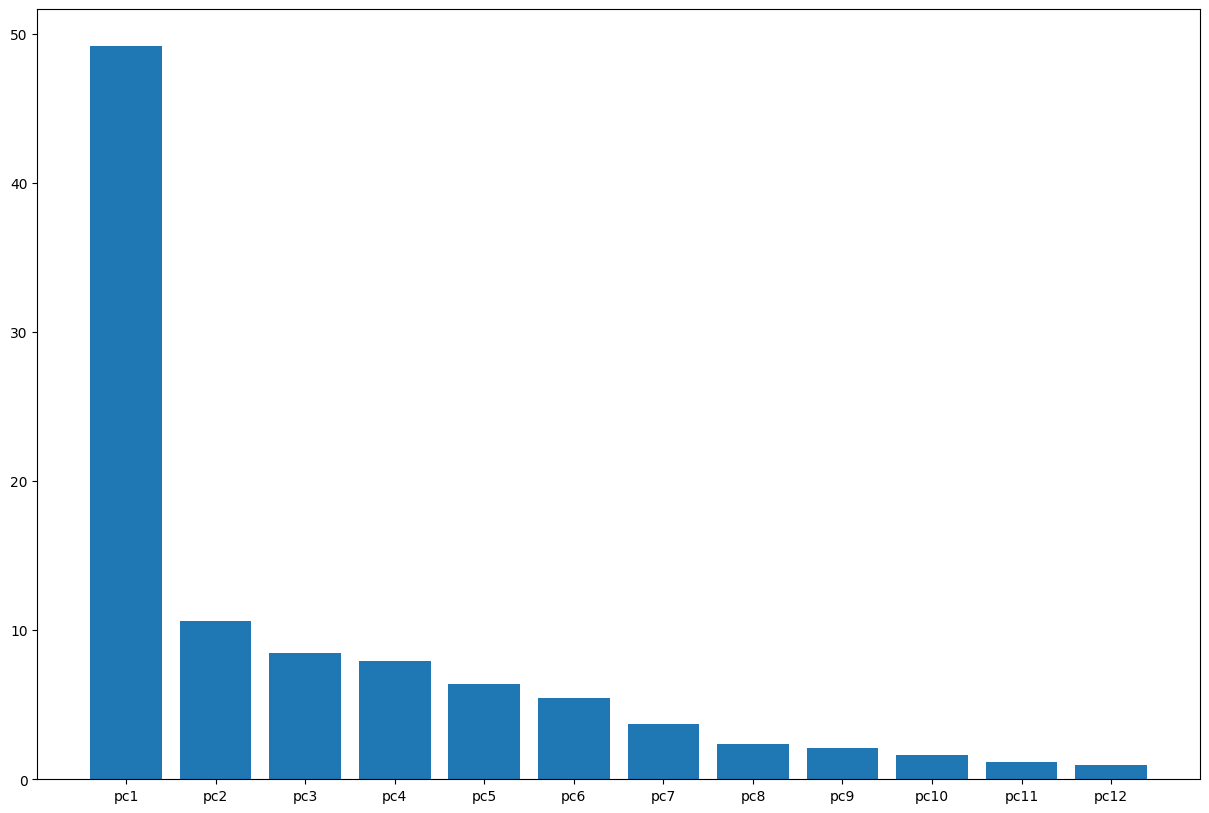

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(cols, pca.explained_variance_ratio_ * 100)

Next, we will visualize its cumulative variance explained.

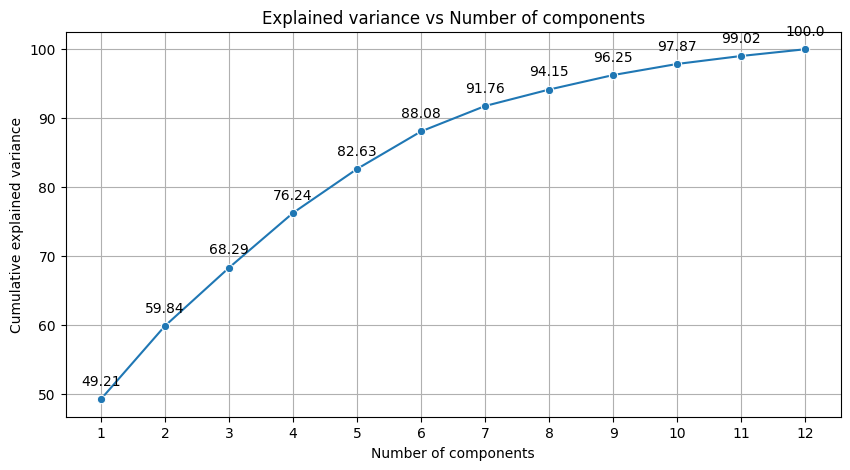

In [ ]:
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_*100)
num_comp = [i for i in range(1,len(feats)+1)]

plt.figure(figsize=(10, 5))

sns.lineplot(x = num_comp, y=cumulative_variance_explained, marker='o')
for i in range(len(num_comp)):
    plt.annotate(round(cumulative_variance_explained[i], 2), (num_comp[i], cumulative_variance_explained[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(num_comp)
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

plt.show()

We would like the reduced data to explain 95% of the actual data. Hence, we will use 9 components out of 12 components.

In [ ]:
n = 9
pca = PCA(n_components=n)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc'+str(i) for i in range(1,n+1)])
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-2.898905,0.669881,0.524582,0.597608,-1.522071,0.018614,0.292714,-0.659166,0.010391
1,-1.514838,-0.422568,0.060330,0.945102,-0.371119,-1.192897,0.143910,0.415790,0.203548
2,-2.390077,0.431471,1.050733,0.019122,-0.053205,-1.609887,-0.565406,0.216231,0.283417
3,-3.038531,-0.009848,1.022587,0.029724,0.488022,-1.573161,-0.882623,-0.141108,-0.362425
4,-2.551451,-0.213937,1.139255,0.242867,0.350444,-1.446000,-0.261280,0.546432,-0.403893


#### Train Test Split

We split the data into train and test dataset both with pca and without pca.

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, random_state = 42)

## Regression Model (20 point)

We will use the linear regression for this project. In this step, we will train the model over the train dataset with and without pca.

In [ ]:
# Without PCA
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_train)
train_r2_nopca = r2_score(y_pred, y_train)
train_mae_nopca = mean_absolute_error(y_pred, y_train)

# With PCA
model2 = LinearRegression()
model2.fit(X_train_pca, y_train_pca)
y_pred = model2.predict(X_train_pca)
train_r2_pca = r2_score(y_pred, y_train_pca)
train_mae_pca = mean_absolute_error(y_pred, y_train_pca)

## Evaluasi (20)

Finally, we will use the model to predict the test dataset and we will evaluate it.

In [ ]:
y_pred = model1.predict(X_test)
test_r2_nopca = r2_score(y_pred, y_test)
test_mae_nopca = mean_absolute_error(y_pred, y_test)

y_pred = model2.predict(X_test_pca)
test_r2_pca = r2_score(y_pred, y_test_pca)
test_mae_pca = mean_absolute_error(y_pred, y_test_pca)

result = pd.DataFrame({'is_pca':['Without PCA', 'With PCA'],
                       'R2 Score (Train)':[train_r2_nopca, train_r2_pca],
                       'MAE Score (Train)':[train_mae_nopca, train_mae_pca],
                       'R2 Score (Test)':[test_r2_nopca, test_r2_pca],
                       'MAE Score (Test)':[test_mae_nopca, test_mae_pca]})

result

,is_pca,R2 Score (Train),MAE Score (Train),R2 Score (Test),MAE Score (Test)
0,Without PCA,0.645801,3.503416,0.673049,3.200194
1,With PCA,0.610955,3.660023,0.618563,3.424508


Based on the result above, we obtain that in every metric score both in train and test dataset, the model can learn better without PCA. This is probably because the number of features is actually already small, thus, reducing the features will not significantly increase the model performance.